In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [4]:
# get unique values for each column
df.drop('customerID', axis=1, inplace=True)
for col in df.columns:
    print(col, df[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

num = list(df.select_dtypes(include=['int64','float64']).keys())
cat = list(df.select_dtypes(include='O').keys())

print(num)
print(cat)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [6]:
for i in cat:
    df[i] = df[i].replace({'Yes':1,'No':0,'No internet service':0})
df['gender'] = df['gender'].replace({'Male':1, 'Female':0})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service':0})

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['InternetService'] = label.fit_transform(df['InternetService'].astype(str))
df['Contract'] = label.fit_transform(df['Contract'].astype(str))
df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'].astype(str))

In [8]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

x = df.drop('Churn',axis=1)
y = df['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10)
print(xtrain.shape, xtest.shape)

(5634, 19) (1409, 19)


In [10]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(xtrain, ytrain, epochs=100)
model.evaluate(xtest, ytest)
ypred = model.predict(xtest)

2023-06-04 23:13:32.258289: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-04 23:13:32.431000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-04 23:13:32.433077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 23:13:33.737932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100
177/177 [==============================] - 2s 2ms/step - loss: 0.5312 - accuracy: 0.7352
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.7769
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.7851
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.7914
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.7907
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.7945
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7968
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7975
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.7971
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4201 - accura

In [11]:
ypred_lis = [1 if i>0.5 else 0 for i in ypred]

data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
6418,0,0
1948,1,1
4497,0,0
66,0,0
1705,0,0
924,0,1
1051,0,1
7012,0,0
3723,0,0
4590,0,0


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1066
           1       0.59      0.49      0.54       343

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.78      0.79      0.79      1409



Text(183.22222222222223, 0.5, 'True_number')

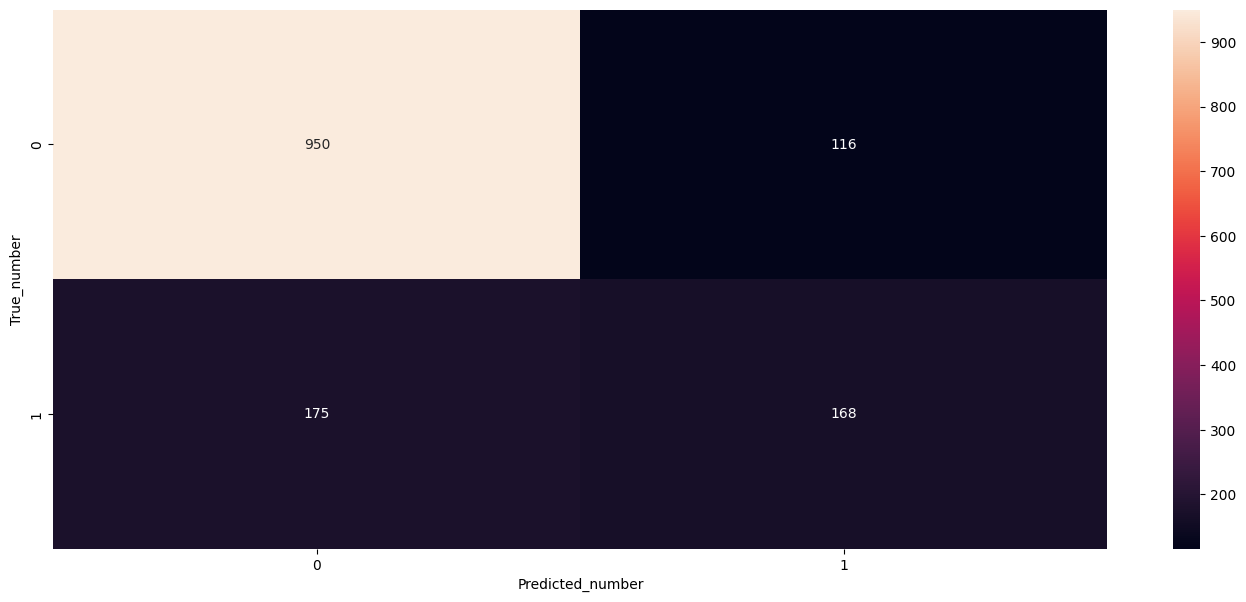

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(ytest, ypred_lis))
conf_mat = tf.math.confusion_matrix(labels=ytest,  predictions=ypred_lis)

plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')